<a href="https://colab.research.google.com/github/prayagpadwal/FIFA-World-Cup-2022/blob/main/1_Finding_the_mean_rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data we’ll use for this analysis is from the game FIFA 22 which contains information about most football players around the world.

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

df = pd.read_csv('players_22.csv', low_memory = False)

This dataset contains more than 100 columns, but for this analysis, we’ll only use a few of them.

In [6]:
df = df[["short_name", "age", "nationality_name", "overall", "potential", "club_name", "value_eur", "wage_eur", "player_positions"]]

Something to keep in mind is that the player_positions column has multiple positions, so we should select only one for this analysis.

Also, we have to drop NaN data.

In [8]:
# selectign only one position 
df['player_positions'] = df['player_positions'].str.split(',', expand = True)[0]

In [10]:
# dropping NaN values 
df.dropna(inplace = True)

In [11]:
df

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,78000000.0,320000.0,RW
1,R. Lewandowski,32,Poland,92,92,FC Bayern München,119500000.0,270000.0,ST
2,Cristiano Ronaldo,36,Portugal,91,91,Manchester United,45000000.0,270000.0,ST
3,Neymar Jr,29,Brazil,91,91,Paris Saint-Germain,129000000.0,270000.0,LW
4,K. De Bruyne,30,Belgium,91,91,Manchester City,125500000.0,350000.0,CM
...,...,...,...,...,...,...,...,...,...
4302,Alexandre Frandeira,21,Brazil,71,71,Atlético Clube Goianiense,1900000.0,6000.0,CB
4303,Dinei Peixo,25,Brazil,71,71,Sport Club Corinthians Paulista,2100000.0,19000.0,RW
4304,Pedrildo Rocha,29,Brazil,71,71,Sport Club Corinthians Paulista,1800000.0,20000.0,LW
4305,Macarinho Louro,21,Brazil,71,71,Bahia,2200000.0,8000.0,LW


# Adjusting the Dataset FIFA 22 to the World Cup 2022
Now we’re going to adapt the dataset FIFA 22 to the World Cup 2022. This means that we’ll only consider those countries that qualified for the competition and only those players that were called up for their national team.

In [12]:
# dropping injured players
players_missing_worldcup = ['K. Benzema', 'S. Mané', 'S. Agüero', 'Sergio Ramos', 'P. Pogba',
                            'M. Reus', 'Diogo Jota', 'A. Harit', 'N. Kanté', 'G. Lo Celso', 'Piqué']

In [13]:
drop_index = df[df['short_name'].isin(players_missing_worldcup)].index
df.drop(drop_index, axis=0, inplace=True)

In [14]:
# filtering only national teams in the world cup
teams_worldcup = [
    'Qatar', 'Brazil', 'Belgium', 'France', 'Argentina', 'England', 'Spain', 'Portugal',
    'Mexico', 'Netherlands', 'Denmark', 'Germany', 'Uruguay', 'Switzerland', 'United States', 'Croatia',
    'Senegal', 'Iran', 'Japan', 'Morocco', 'Serbia', 'Poland', 'South Korea', 'Tunisia',
    'Cameroon', 'Canada', 'Ecuador', 'Saudi Arabia', 'Ghana', 'Wales', 'Costa Rica', 'Australia'
]

df = df[df['nationality_name'].isin(teams_worldcup)]

# The Metric To Use for This Analysis
For this analysis, we’ll use the FIFA ratings for each player. The rating is represented by the overall column.

Let’s sort the dataframe by overall (in case multiple players have the same rating, we’ll also sort by the potential and value_eur columns)

In [20]:
df.sort_values(by=['overall', 'potential', 'value_eur'], ascending=False, inplace=True)

<ipython-input-20-4249fa0883e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['overall', 'potential', 'value_eur'], ascending=False, inplace=True)


In [21]:
df

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,78000000.0,320000.0,RW
1,R. Lewandowski,32,Poland,92,92,FC Bayern München,119500000.0,270000.0,ST
6,K. Mbappé,22,France,91,95,Paris Saint-Germain,194000000.0,230000.0,ST
3,Neymar Jr,29,Brazil,91,91,Paris Saint-Germain,129000000.0,270000.0,LW
4,K. De Bruyne,30,Belgium,91,91,Manchester City,125500000.0,350000.0,CM
...,...,...,...,...,...,...,...,...,...
3837,M. Barovero,37,Argentina,71,71,Club Atlético de San Luis,210000.0,5000.0,GK
3841,L. Pocrnjic,39,Argentina,71,71,Club Atlético Aldosivi,210000.0,4000.0,GK
3846,P. Tschauner,35,Germany,71,71,RB Leipzig,210000.0,18000.0,GK
3857,J. Moulin,35,France,71,71,ESTAC Troyes,210000.0,6000.0,GK


Let's examine the distribution of player ratings, also known as overall scores, for all players participating in the World Cup 2022.

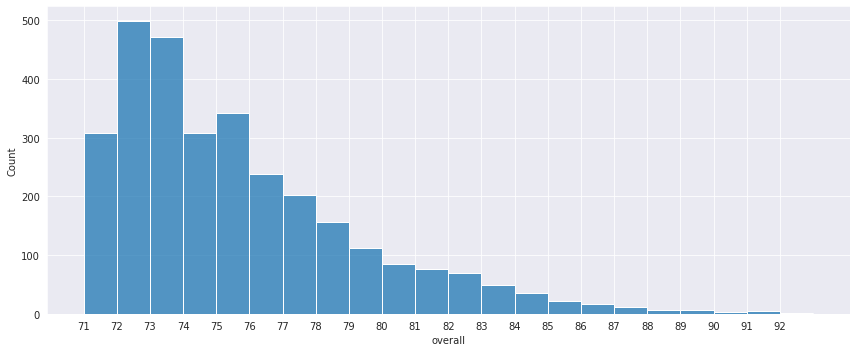

In [22]:
import numpy as np
fig, ax = plt.subplots(figsize=(12, 5), tight_layout=True)

sns.histplot(df, x='overall', binwidth=1)

bins = np.arange(df['overall'].min(), df['overall'].max(), 1)
plt.xticks(bins)
plt.show()

It seems most players have a rating of 72 and 72. For our dream team, we’ll consider only the players with the highest rating per position.

# Dream Team World Cup 2022
A simple way to get the dream team is by dropping every duplicate in the player_positions column (the df is sorted by overall, so the “non-duplicates” will be those players with the highest ratings)

In [23]:
df.drop_duplicates('player_positions')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,78000000.0,320000.0,RW
1,R. Lewandowski,32,Poland,92,92,FC Bayern München,119500000.0,270000.0,ST
3,Neymar Jr,29,Brazil,91,91,Paris Saint-Germain,129000000.0,270000.0,LW
4,K. De Bruyne,30,Belgium,91,91,Manchester City,125500000.0,350000.0,CM
8,M. ter Stegen,29,Germany,90,92,FC Barcelona,99000000.0,250000.0,GK
19,J. Kimmich,26,Germany,89,90,FC Bayern München,108000000.0,160000.0,CDM
15,V. van Dijk,29,Netherlands,89,89,Liverpool,86000000.0,230000.0,CB
28,Bruno Fernandes,26,Portugal,88,89,Manchester United,107500000.0,250000.0,CAM
44,T. Alexander-Arnold,22,England,87,92,Liverpool,114000000.0,150000.0,RB
45,J. Sancho,21,England,87,91,Manchester United,116500000.0,150000.0,RM
